<a href="https://colab.research.google.com/github/AnIsAsPe/Estadistica_y_Probabilidad_para-CD-/blob/main/PrincipiosDeProbabilidad/Semana4/2%20Teorema_del_limite_central.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Importar liberías y archivos

In [12]:
import numpy as np
import pandas as pd

import random
import operator
import re # módulo operaciones expresiones regulares
import unicodedata  #para quitar tildes
from collections import Counter
from scipy.stats import norm

import matplotlib.pyplot as plt
import seaborn as sns

## Definición de funciones

In [13]:
def errores_alturas(n, m = 500):
    '''
    n = tamaño de cada muestra
    m = cuántas muestras

    '''
    mu, sigma = 1675, 62.8     # dimensiones en milimetros

    muestras = {'muestra '+ str(i): np.random.normal(mu, sigma,n) for i in range(1, m+1)}
    alturas_hombres = pd.DataFrame.from_dict(muestras)
    sns.distplot(mu - alturas_hombres.mean(), fit=norm, kde=False, bins=50)
    plt.show()



In [14]:
def leer_libro(archivo_txt):
  '''funcion para leer un archivo en formato txt'''
  with open(archivo_txt, "r", encoding="utf8") as f:
    texto = f.read()
    texto = texto.replace("\n", "").replace("\r", "")
  return texto

In [15]:
def borrar_elementos(texto, lista):
  '''Función para eliminar en un texto los elementos contenidos en una lista,
  por ejemplo:   autor, titulo y otros elementos'''

  for elemento in lista:
    texto = texto.replace(elemento, "")
  return texto

In [16]:

def limpiar_texto(texto):
  '''Función para convertir a minúsculas, quitar signos de puntuación,
  números y tildes'''

  #Convertir en mínusculas
  texto_limpio = texto.lower()

  #Quitar puntuación
  puntuacion = [".", "," , "-", "\n", ":", ";",'"', "'", "  ",
                "!", "¡", "¿", "?", "(", ")", "<", "«", "»", "~",]
  for p in puntuacion:
    texto_limpio = texto_limpio.replace(p,"")

  #Quitar numeros

  texto_limpio = "".join(filter(lambda x: not x.isdigit(), texto_limpio))

  #Quitar tildes

  texto_limpio =''.join((c for c in unicodedata.normalize('NFD',texto_limpio) if
                         unicodedata.category(c) != 'Mn'))

  return texto_limpio

In [17]:

def genera_texto_nletras(texto, n=1, tot_letras = 100):
  '''Devuelve un texto, utilizando ngramas a partir de letras
  n es la cantidad de letras que se toman en consideración para
  generar la siguiente'''
  ngramas = {}
  for i in range(len(texto) - n):
    seq = texto[i:i+n]
    if seq not in ngramas.keys():
      ngramas[seq] = []
    ngramas[seq].append(texto[i+n])

  ngrama = np.random.choice(list(ngramas.keys()))
  nuevo_texto = ngrama

  for i in range(tot_letras):
    if ngrama not in ngramas.keys():
      break
    siguiente_letra = np.random.choice(ngramas[ngrama])
    nuevo_texto += siguiente_letra
    ngrama = nuevo_texto[len(nuevo_texto)-n:len(nuevo_texto)]
  return nuevo_texto

In [18]:
def genera_muestras_de_texto(texto, grado=0,
                             num_muestras=100,
                             tam_muestra=200 ):
  muestras={}
  for i in range(num_muestras):
    if grado == 0:
      muestras[i]= "".join(random.sample(texto, tam_muestra))
    else:
      muestras[i] = genera_texto_nletras(texto, grado, tam_muestra)
  return pd.Series(muestras, name= 'muestra' )

In [19]:
def cuenta_vocales(texto):
  vocales ='aeiou'
  tot_vocales= 0
  for caracter in texto:
    if caracter in vocales:
      tot_vocales += 1
  return tot_vocales

In [20]:
def cuenta_caracteres_antes_de_n(texto):
  caracteres_antes = 0
  for caracter in texto:
    if caracter == 'n':
      break
    caracteres_antes += 1

  return caracteres_antes

# Distribución gaussiana

## Obtener muestras

a partir de la [distribución de la altura de trabajadores industriales de sexo masculino en Guadalajara](https://www.researchgate.net/publication/31722433_Dimensiones_antropometricas_de_la_poblacion_latinoamericana_Mexico_Cuba_Colombia_Chile_R_Avila_Chaurand_LR_Prado_Leon_EL_Gonzalez_Munoz)

In [21]:
mu, sigma = 1675, 62.8     # dimensiones en milimetros

n = 100 # tamaño de la muestra
m = 1000 # número de muestras
muestras = {'muestra '+str(i): np.random.normal(mu, sigma,n) for i in range(1, m+1)}
alturas_hombres = pd.DataFrame.from_dict(muestras)
alturas_hombres

,muestra 1,muestra 2,muestra 3,muestra 4,muestra 5,muestra 6,muestra 7,muestra 8,muestra 9,muestra 10,...,muestra 991,muestra 992,muestra 993,muestra 994,muestra 995,muestra 996,muestra 997,muestra 998,muestra 999,muestra 1000
0,1692.534815,1682.994887,1758.660528,1677.403928,1626.643181,1687.452720,1537.091995,1671.782621,1664.880461,1669.586409,...,1769.928131,1580.717721,1596.106041,1729.374779,1624.745261,1618.951206,1729.946783,1630.439414,1682.823698,1692.620974
1,1797.184491,1557.641206,1713.240747,1714.984718,1683.664581,1591.432204,1637.536328,1597.455960,1565.314643,1599.979314,...,1674.630459,1716.283248,1681.411396,1759.801873,1642.202988,1666.229484,1574.701218,1600.441608,1702.526945,1687.084913
2,1672.075915,1695.648354,1614.952559,1720.671035,1606.167042,1595.907475,1559.832084,1608.703201,1670.586778,1652.885743,...,1608.147474,1672.861711,1699.270576,1647.480649,1597.882514,1796.891787,1638.309938,1678.220800,1736.885077,1653.630345
3,1684.635313,1675.179765,1586.517585,1551.250895,1560.642409,1746.069908,1692.273355,1786.814989,1614.441102,1778.646608,...,1533.543033,1591.986920,1659.761607,1607.178630,1692.490789,1631.340024,1620.072831,1677.698720,1685.881173,1712.782540
4,1783.252866,1618.839198,1701.013569,1660.564455,1646.660348,1666.384721,1687.020666,1628.653370,1656.012695,1541.786845,...,1730.782935,1677.346844,1636.716037,1682.991688,1629.358100,1604.967455,1696.725800,1728.181660,1632.739602,1683.414000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1712.248219,1791.246441,1597.832707,1606.681846,1661.983671,1731.109189,1722.086612,1618.766043,1582.890054,1662.478872,...,1735.211523,1648.192007,1690.393329,1657.649362,1703.157378,1695.425256,1634.834597,1622.213317,1728.634345,1692.522521
96,1715.245220,1732.156017,1635.097134,1598.172304,1661.818793,1672.384267,1607.399230,1656.599815,1747.742510,1647.025888,...,1709.542971,1622.840027,1582.426935,1692.958245,1680.300113,1625.807536,1663.299969,1766.970221,1677.357189,1607.748662
97,1722.959281,1676.114699,1655.614775,1532.717079,1697.407133,1634.367799,1630.522240,1715.527062,1641.506458,1705.384382,...,1701.119137,1649.181928,1733.469630,1746.463999,1605.495323,1607.364658,1692.919905,1655.519322,1686.440967,1696.012805
98,1702.954087,1654.151474,1797.464723,1666.681705,1710.171585,1662.340871,1736.044092,1672.635518,1582.985900,1701.043906,...,1722.614109,1666.019674,1684.279787,1624.709132,1767.442218,1674.845073,1615.372705,1627.761209,1649.988934,1721.373429


<h2> Distribución de cada muestra

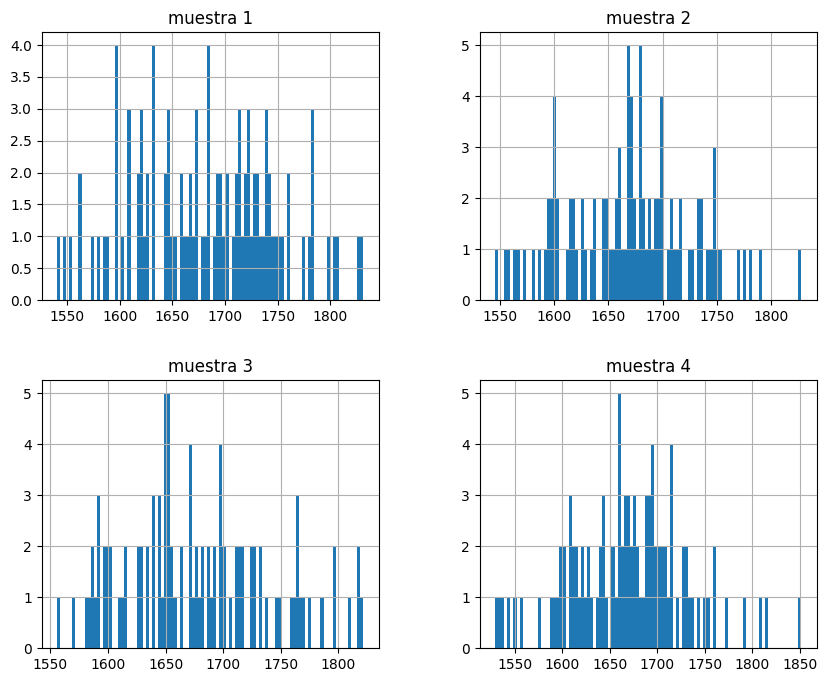

In [22]:
alturas_hombres.iloc[:,0:4].hist(figsize = (10,8), bins=100)
plt.show()

## Distribución de los promedios

In [23]:
medias = alturas_hombres.mean()
medias

muestra 1       1681.765822
muestra 2       1667.993510
muestra 3       1677.229452
muestra 4       1668.654124
muestra 5       1676.325375
                   ...     
muestra 996     1672.246656
muestra 997     1675.370089
muestra 998     1667.621154
muestra 999     1682.660899
muestra 1000    1673.728593
Length: 1000, dtype: float64

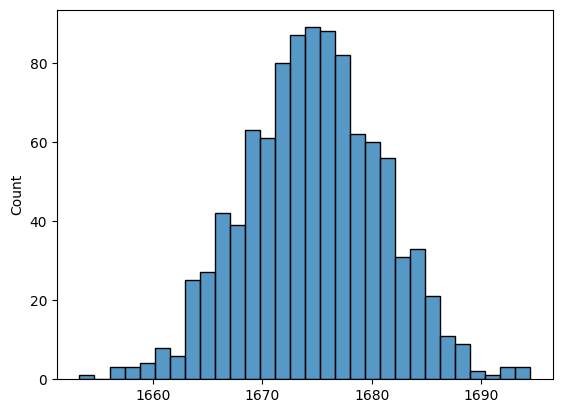

In [24]:
sns.histplot(medias,  bins=30)
plt.show()

## Distribución de los errores

In [25]:
errores = mu - medias
errores

muestra 1      -6.765822
muestra 2       7.006490
muestra 3      -2.229452
muestra 4       6.345876
muestra 5      -1.325375
                  ...   
muestra 996     2.753344
muestra 997    -0.370089
muestra 998     7.378846
muestra 999    -7.660899
muestra 1000    1.271407
Length: 1000, dtype: float64

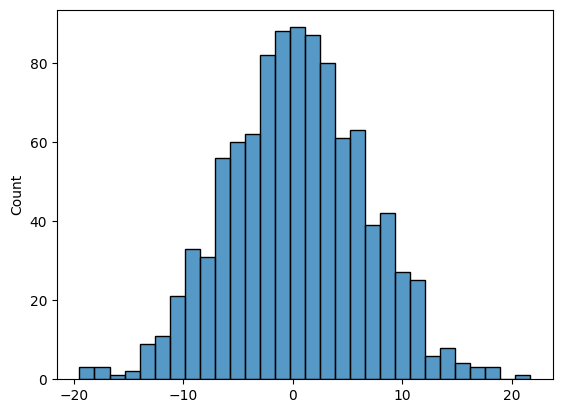

In [26]:
sns.histplot(errores,  bins=30)
plt.show()

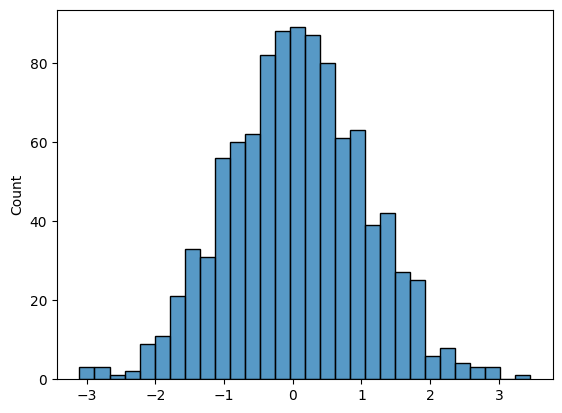

In [27]:
# podemos llegar a la distribución normal estandar
sns.histplot(errores/(sigma/np.sqrt(n)),  bins=30)
plt.show()

# Distribución Bernoulli

#### Preprocesar libro y obtener probabilidades de los caracteres

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [29]:
#Leer libro
libro = leer_libro('/content/drive/MyDrive/Datos/gabriel_garcia_marquez_cien_annos_soledad.txt')
borrar = ['Gabriel García Márquez',
          'Cien años de soledad',
          'EDITADO POR "EDICIONES LA CUEVA"',
          'Para J omi García Ascot y María Luisa Elio']

libro =  borrar_elementos(libro, borrar)
libro_limpio = limpiar_texto(libro)

In [30]:
#Cargar csv con distribución de probabilidad de letras
Ley_P_letras = pd.read_csv('https://raw.githubusercontent.com/AnIsAsPe/ElementosEstadisticaMachineLearningPython/master/Semana4/Ley_Probabilidad_caracteres_100a%C3%B1os.csv')

# Calcular la probabilidad de obtener una vocal

filtro_vocal = Ley_P_letras['caracter'].isin(list('aeiou'))
p = Ley_P_letras.loc[filtro_vocal, 'probabilidad'].sum()
p

0.38405272562528125

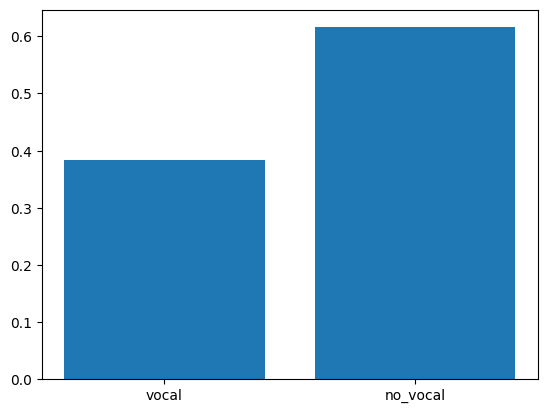

In [31]:
# Distribución bernoulli

plt.bar(['vocal','no_vocal'],[p, 1-p])
plt.show()

### Obtener muestras

In [41]:
%%time
n = 400 # tamaño de la muestra
m = 100000 # número de muestras

muestras=pd.DataFrame()
muestras['texto'] = (genera_muestras_de_texto(libro_limpio, grado = 0,
                                              num_muestras = m, tam_muestra=n))
indice=pd.Series(['muestra_'+str(i) for i in range (1, m+1)])
muestras.index=indice
muestras['vocales'] = muestras['texto'].apply(cuenta_vocales)
muestras['p_estimada'] = muestras['vocales']/n
muestras['errores']= p - muestras['vocales']/n

CPU times: user 28.9 s, sys: 33.7 ms, total: 29 s
Wall time: 30.9 s


In [42]:
muestras.head()

,texto,vocales,p_estimada,errores
muestra_1,ta beoupodouasnraesaeoraolreiolemraamruadihc ...,161,0.4025,-0.018447
muestra_2,eecgooclaa tceealicsuauca e ep tpe noe ovdode...,153,0.3825,0.001553
muestra_3,so anyrr lsnalaanea dn lbeerl oanea uooe t os...,142,0.3550,0.029053
muestra_4,ssmarrsatsdrareela diavlaaah l soiablepgem n b...,159,0.3975,-0.013447
muestra_5,dt a dsiaoiouusi gy lrae ra uooasmaa ce lleno...,151,0.3775,0.006553


### Distribución de los promedios

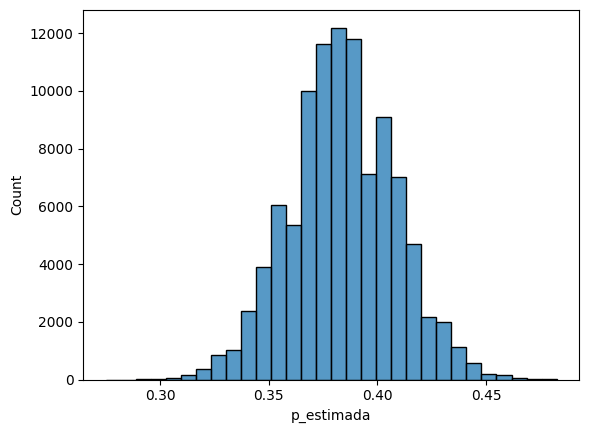

In [43]:
sns.histplot(muestras['p_estimada'],  bins=30)
plt.show()

## Distribución de los errores

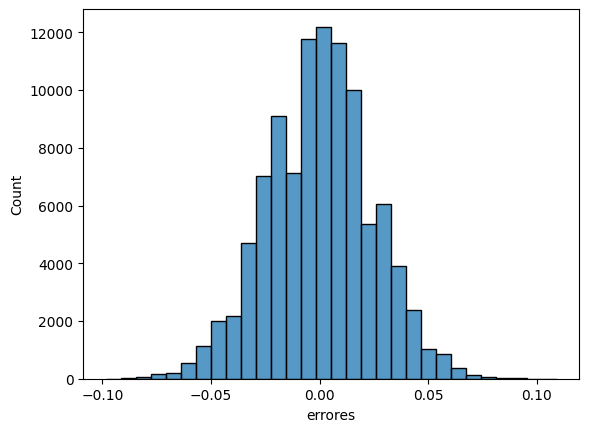

In [44]:
sns.histplot(muestras['errores'],  bins=30)
plt.show()

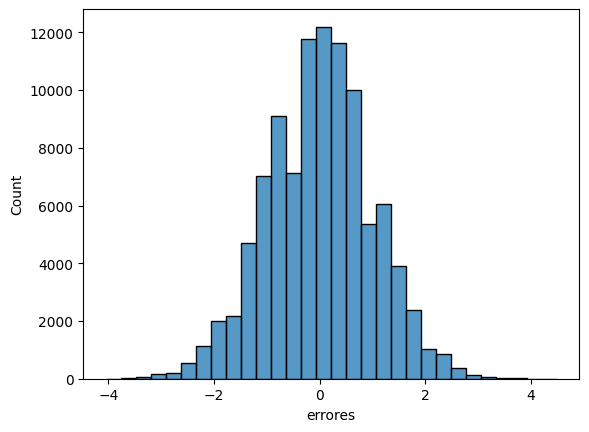

In [45]:
# podemos llegar a la distribución normal estandar
sigma = np.sqrt(p*(1-p))
sns.histplot(muestras['errores']/(sigma/np.sqrt(n)),  bins=30)
plt.show()

# Distribución exponencial

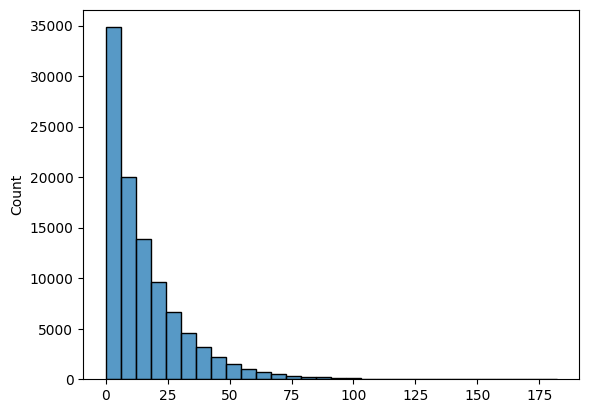

In [46]:
X = muestras['texto'].apply(cuenta_caracteres_antes_de_n).values
sns.histplot(X,  bins=30)
plt.show()

In [47]:
X.mean()

15.85674

**Ejemplos de fenómenos con distribución exponencial:**
- Valores máximos de precipitación diaria
- Compras efectuadas por visitantes en página web
- Tiempo para que se produzca un fallo


¿Qué otros??

### Obtener muestras

In [48]:
n = 200 # tamaño de la muestra
m = 2000 # número de muestras
m_exp = {'muestra '+str(i):np.random.choice(X, n) for i in range(1, m+1)}

muestras_exp = pd.DataFrame.from_dict(m_exp)
muestras_exp

,muestra 1,muestra 2,muestra 3,muestra 4,muestra 5,muestra 6,muestra 7,muestra 8,muestra 9,muestra 10,...,muestra 1991,muestra 1992,muestra 1993,muestra 1994,muestra 1995,muestra 1996,muestra 1997,muestra 1998,muestra 1999,muestra 2000
0,14,2,43,13,3,2,5,5,11,1,...,26,13,3,0,8,33,28,3,17,13
1,13,0,1,2,15,5,14,56,8,12,...,5,29,9,2,26,10,19,2,3,3
2,2,69,2,17,8,10,14,3,16,4,...,17,3,74,23,8,22,0,7,25,3
3,6,5,7,47,43,38,21,0,12,4,...,42,20,15,15,11,8,4,39,37,10
4,5,27,7,24,14,1,10,4,85,6,...,5,2,65,4,3,11,5,3,19,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,3,28,5,7,6,0,8,2,6,14,...,12,6,17,26,13,7,1,25,1,15
196,4,8,20,29,21,7,2,8,4,50,...,0,3,6,0,9,7,49,20,0,40
197,39,50,27,9,5,7,1,17,30,8,...,61,3,25,15,25,4,27,18,9,4
198,15,28,7,4,4,10,14,9,40,16,...,8,16,18,10,16,18,7,16,10,8


### Distribución de cada muestra

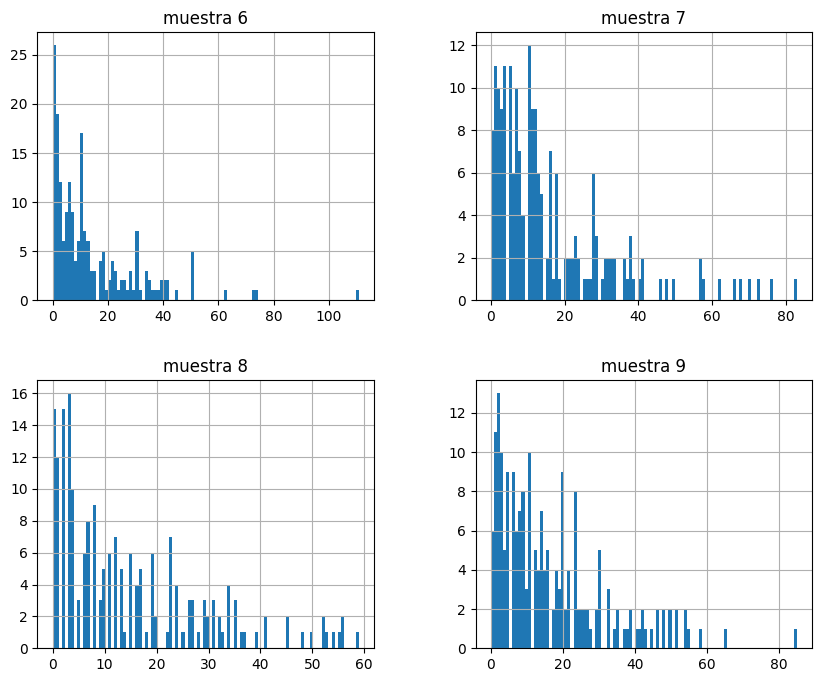

In [49]:
muestras_exp.iloc[:,5:9].hist(figsize = (10,8), bins=100)
plt.show()

### Distribución de los promedios

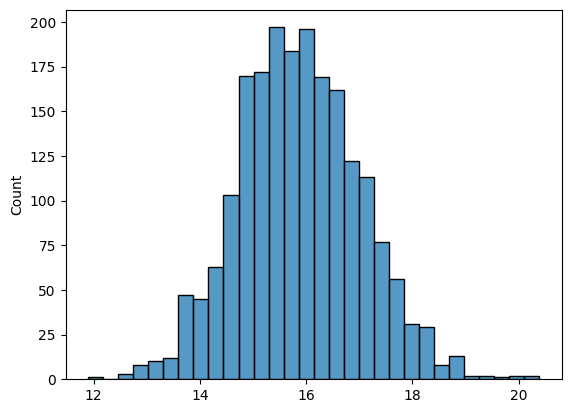

In [50]:
sns.histplot(muestras_exp.mean(),  bins=30)
plt.show()


## Distribución de los errores

In [51]:
X.mean()

15.85674

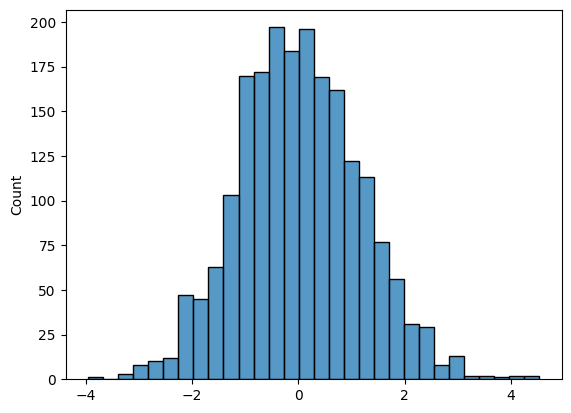

In [52]:
errores = muestras_exp.mean() - X.mean()
sns.histplot(errores,  bins=30)
plt.show()



https://seeing-theory.brown.edu/probability-distributions/index.html

